In [2]:
import rasterio as rio
import geopandas as gpd
import sys
from rasterstats import zonal_stats
sys.path.insert(1, '../src')
# import data_sources as dts

from pathlib import Path

from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import numpy as np

In [13]:
dt = gpd.read_file('../data/00mun.shp', encoding="utf-8")#conica lambder
dt

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774..."
1,01002,01,002,Asientos,"POLYGON ((2494680.261 1141224.505, 2494749.948..."
2,01003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902..."
3,01004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
4,01005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546..."
...,...,...,...,...,...
2464,32053,32,053,Villa González Ortega,"POLYGON ((2504476.172 1180670.127, 2504478.046..."
2465,32054,32,054,Villa Hidalgo,"POLYGON ((2531223.368 1166188.348, 2531242.386..."
2466,32055,32,055,Villanueva,"POLYGON ((2420011.778 1183552.394, 2420043.461..."
2467,32056,32,056,Zacatecas,"POLYGON ((2421707.751 1202019.971, 2421780.086..."


In [10]:
dt

,geometry
0,"POLYGON ((2489072.503 1115771.584, 2489352.774..."
1,"POLYGON ((2494680.261 1141224.505, 2494749.948..."
2,"POLYGON ((2429607.454 1120262.254, 2429071.902..."
3,"POLYGON ((2470517.824 1155028.588, 2470552.248..."
4,"POLYGON ((2465526.729 1114740.466, 2465752.546..."
...,...
2464,"POLYGON ((2504476.172 1180670.127, 2504478.046..."
2465,"POLYGON ((2531223.368 1166188.348, 2531242.386..."
2466,"POLYGON ((2420011.778 1183552.394, 2420043.461..."
2467,"POLYGON ((2421707.751 1202019.971, 2421780.086..."


In [3]:
dt.crs = "MEXICO_ITRF_2008_LCC"

In [4]:
dt.crs

<Derived Projected CRS: EPSG:6372>
Name: Mexico ITRF2008 / LCC
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Mexico - onshore and offshore.
- bounds: (-122.19, 12.1, -84.64, 32.72)
Coordinate Operation:
- name: Mexico LCC
- method: Lambert Conic Conformal (2SP)
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

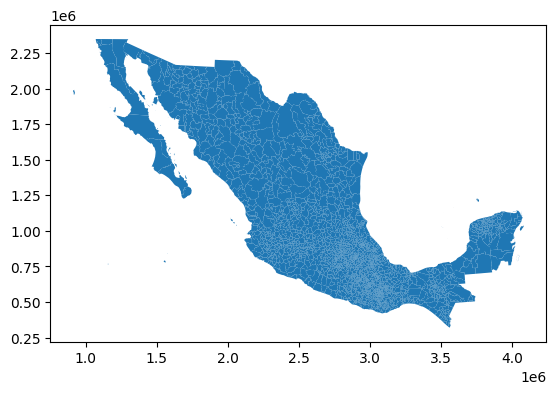

In [5]:
dt.plot()

In [6]:
dt_5 = dt.to_crs("ESRI:54009")
dt_5

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((-9763561.303 2701712.806, -9763426.0..."
1,01002,01,002,Asientos,"POLYGON ((-9748415.565 2729458.549, -9748360.2..."
2,01003,01,003,Calvillo,"POLYGON ((-9817261.447 2706429.502, -9818061.1..."
3,01004,01,004,Cosío,"POLYGON ((-9765524.823 2744466.535, -9765510.6..."
4,01005,01,005,Jesús María,"POLYGON ((-9785899.303 2700549.051, -9785708.9..."
...,...,...,...,...,...
2464,32053,32,053,Villa González Ortega,"POLYGON ((-9723690.265 2772421.079, -9723689.5..."
2465,32054,32,054,Villa Hidalgo,"POLYGON ((-9704517.954 2756617.378, -9704503.0..."
2466,32055,32,055,Villanueva,"POLYGON ((-9801425.151 2775321.949, -9801404.7..."
2467,32056,32,056,Zacatecas,"POLYGON ((-9792480.422 2795430.577, -9792424.8..."


<Axes: >

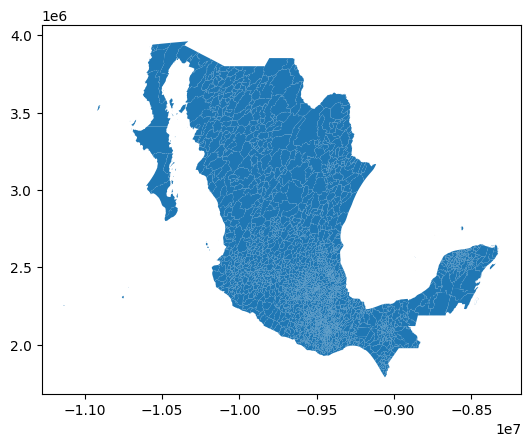

In [7]:
dt_5.plot()

In [8]:
Mont = dt_5[dt_5['NOMGEO'].str.contains('Guadalajara')]
# Mont = dt_5[dt_5['NOMGEO'] == "México"]
Mont

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
577,14039,14,039,Guadalajara,"POLYGON ((-9933770.500 2544176.533, -9933658.1..."


<Axes: >

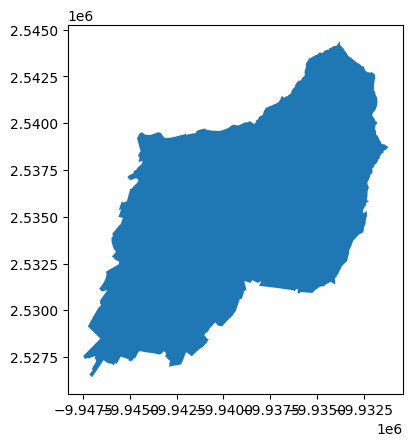

In [9]:
Mont.plot()

In [10]:
m_bound = Mont.bounds
m_bound

,minx,miny,maxx,maxy
577,-9.947500e+06,2.526420e+06,-9.931208e+06,2.544378e+06


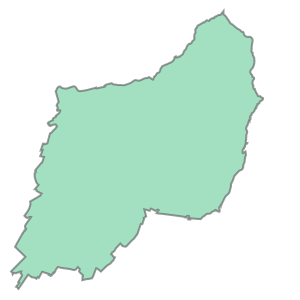

In [11]:
Mont.loc[577].geometry

In [12]:
print(*m_bound.loc[577])

-9947500.356369967 2526420.108787522 -9931208.489283007 2544378.3654652946


In [13]:
dt_5[:1]

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry
0,01001,01,001,Aguascalientes,"POLYGON ((-9763561.303 2701712.806, -9763426.0..."


In [14]:
dt_5[:5].loc[0]

CVEGEO                                                  01001
CVE_ENT                                                    01
CVE_MUN                                                   001
NOMGEO                                         Aguascalientes
geometry    POLYGON ((-9763561.30336033 2701712.80633368, ...
Name: 0, dtype: object

In [34]:
def poli_np_from_bbox_s3_without_extra_data(years, poli_bbox, bucket='tec-expansion-urbana-p'):

    # bb_bounds = poli_bbox.bounds
    geom = poli_bbox['geometry']
    statistics = {}

    for year in years:
        url = f'http://{bucket}.s3.amazonaws.com/GHSL/GHS_BUILT_S/GHS_BUILT_S_E{year}_GLOBE_R2022A_54009_100_V1_0.tif'
        with rio.open(url) as src:
            
            def window_from_bound(i, bbox):
                profile = src.profile.copy()
                transform = profile['transform']
                window = rio.windows.from_bounds(*bbox, transform).round_lengths().round_offsets()
                new_transform = src.window_transform(window)
                profile.update({
                    'height': window.height,
                    'width': window.width,
                    'transform': new_transform})
                subset = src.read(window=window)

                st = zonal_stats(geom.loc[i], subset[0], affine=src.transform)

                return [st[0]['count']]
            
            statistics[year] = [window_from_bound(i, bbox.bounds)[0] for i, bbox in enumerate(geom.values)]
        

        
    return statistics

In [35]:
def poli_np_from_bbox_s3(s3_path, poli_bbox, bucket='tec-expansion-urbana-p'):
    url = f'http://{bucket}.s3.amazonaws.com/{s3_path}'

    # bb_bounds = poli_bbox.bounds
    geom = poli_bbox['geometry']

    with rio.open(url) as src:
        
        def window_from_bound(i, bbox):
            profile = src.profile.copy()
            transform = profile['transform']
            window = rio.windows.from_bounds(*bbox, transform).round_lengths().round_offsets()
            new_transform = src.window_transform(window)
            profile.update({
                'height': window.height,
                'width': window.width,
                'transform': new_transform})
            subset = src.read(window=window)

            st = zonal_stats(geom.loc[i], subset[0], affine=src.transform)

            return [*poli_bbox.loc[i], st[0]['count'], subset[0], profile]
        
        stats = [window_from_bound(i, bbox.bounds) for i, bbox in enumerate(geom.values)]
        
    return stats
        


In [59]:
results = poli_np_from_bbox_s3("GHSL/GHS_BUILT_S/GHS_BUILT_S_E2020_GLOBE_R2022A_54009_100_V1_0.tif", dt_5)


In [43]:
years = [year for year in range (2015, 2025, 5)]
years

[2015, 2020]

In [39]:
results = poli_np_from_bbox_s3_without_extra_data(years, dt_5)


In [41]:
years_count = gpd.GeoDataFrame(results)

In [49]:
years_count

,1975,1980,1985,1990,1995,2000,2005,2010,2015,2020
0,118396,118396,118396,118396,118396,118396,118396,118396,118396,118396
1,55148,55148,55148,55148,55148,55148,55148,55148,55148,55148
2,93722,93722,93722,93722,93722,93722,93722,93722,93722,93722
3,13016,13016,13016,13016,13016,13016,13016,13016,13016,13016
4,50737,50737,50737,50737,50737,50737,50737,50737,50737,50737
...,...,...,...,...,...,...,...,...,...,...
2464,43395,43395,43395,43395,43395,43395,43395,43395,43395,43395
2465,37711,37711,37711,37711,37711,37711,37711,37711,37711,37711
2466,218945,218945,218945,218945,218945,218945,218945,218945,218945,218945
2467,44364,44364,44364,44364,44364,44364,44364,44364,44364,44364


In [40]:
[*dt_5]

['CVEGEO', 'CVE_ENT', 'CVE_MUN', 'NOMGEO', 'geometry']

In [60]:
results_gdf = gpd.GeoDataFrame(results, columns=["CVEGEO", "CVE_ENT", "CVE_MUN", "NOMGEO", "geometry", "count", "subsets", "profiles"])


In [61]:
results_gdf

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,count,subsets,profiles
0,01001,01,001,Aguascalientes,"POLYGON ((-9763561.303 2701712.806, -9763426.0...",118396,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[driver, dtype, nodata, width, height, count, ..."
1,01002,01,002,Asientos,"POLYGON ((-9748415.565 2729458.549, -9748360.2...",55148,"[[102, 0, 0, 0, 1022, 182, 2, 0, 0, 0, 0, 0, 2...","[driver, dtype, nodata, width, height, count, ..."
2,01003,01,003,Calvillo,"POLYGON ((-9817261.447 2706429.502, -9818061.1...",93722,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[driver, dtype, nodata, width, height, count, ..."
3,01004,01,004,Cosío,"POLYGON ((-9765524.823 2744466.535, -9765510.6...",13016,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[driver, dtype, nodata, width, height, count, ..."
4,01005,01,005,Jesús María,"POLYGON ((-9785899.303 2700549.051, -9785708.9...",50737,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[driver, dtype, nodata, width, height, count, ..."
...,...,...,...,...,...,...,...,...
2464,32053,32,053,Villa González Ortega,"POLYGON ((-9723690.265 2772421.079, -9723689.5...",43395,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[driver, dtype, nodata, width, height, count, ..."
2465,32054,32,054,Villa Hidalgo,"POLYGON ((-9704517.954 2756617.378, -9704503.0...",37711,"[[0, 0, 0, 1128, 3675, 3969, 3087, 2909, 1201,...","[driver, dtype, nodata, width, height, count, ..."
2466,32055,32,055,Villanueva,"POLYGON ((-9801425.151 2775321.949, -9801404.7...",218945,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[driver, dtype, nodata, width, height, count, ..."
2467,32056,32,056,Zacatecas,"POLYGON ((-9792480.422 2795430.577, -9792424.8...",44364,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[driver, dtype, nodata, width, height, count, ..."


In [204]:
cities_target = ['Monterrey', 'Mérida', 'Guadalajara', 'Aguascalientes', 'Puebla']

In [205]:
results_gdf[results_gdf['NOMGEO'].isin(cities_target)]

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,count,subsets,profiles
0,01001,01,001,Aguascalientes,"POLYGON ((-9763561.303 2701712.806, -9763426.0...",118396,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[driver, dtype, nodata, width, height, count, ..."
577,14039,14,039,Guadalajara,"POLYGON ((-9933770.500 2544176.533, -9933658.1...",15177,"[[0, 0, 0, 0, 22, 26, 124, 0, 433, 0, 0, 10, 3...","[driver, dtype, nodata, width, height, count, ..."
996,19039,19,039,Monterrey,"POLYGON ((-9427612.021 3147817.903, -9427607.4...",32572,"[[5863, 3807, 1843, 292, 61, 1294, 2926, 2229,...","[driver, dtype, nodata, width, height, count, ..."
1675,21114,21,114,Puebla,"POLYGON ((-9482252.903 2358053.177, -9482262.2...",53811,"[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[driver, dtype, nodata, width, height, count, ..."
2330,31050,31,050,Mérida,"POLYGON ((-8597541.258 2597093.431, -8597316.1...",87898,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[driver, dtype, nodata, width, height, count, ..."


In [62]:
results_gdf[results_gdf['NOMGEO'] == "Guadalajara"]['subsets'].values[0]

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,    0,    0,    0],
       ...,
       [4706, 4905, 3807, ...,    0,    0,  148],
       [5450, 4651, 4354, ...,  116,    0,    0],
       [5117, 5038, 3954, ..., 1000,    0,    0]], dtype=uint16)

In [63]:
results_gdf[results_gdf['NOMGEO'] == "Guadalajara"]['subsets'].values[0].sum()

108692719

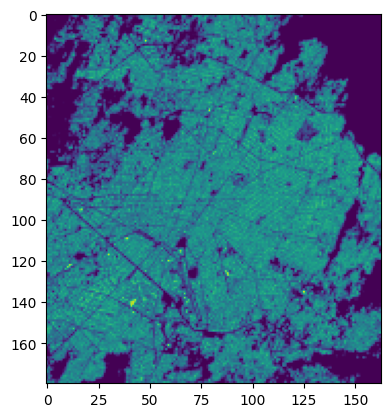

In [53]:
plt.imshow(results_gdf[results_gdf['NOMGEO'] == "Guadalajara"]['subsets'].values[0])

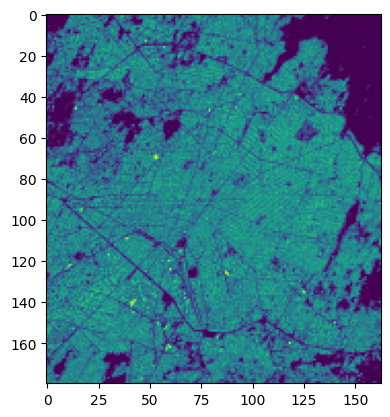

In [64]:
plt.imshow(results_gdf[results_gdf['NOMGEO'] == "Guadalajara"]['subsets'].values[0])

In [50]:
def np_from_bbox_s3(s3_path, bbox, bucket='tec-expansion-urbana-p', nodata_to_zero=False):
    url = f'http://{bucket}.s3.amazonaws.com/{s3_path}'
    
    with rio.open(url) as src:
        profile = src.profile.copy()
        transform = profile['transform']
        window = rio.windows.from_bounds(*bbox.bounds, transform).round_lengths().round_offsets()
        # The transform is specified as (dx, rot_x, x_0 , rot_y, dy, y0)
        new_transform = src.window_transform(window)
        profile.update({
            'height': window.height,
            'width': window.width,
            'transform': new_transform})
        subset = src.read(window=window)
    if nodata_to_zero:
        subset[subset == profile['nodata']] = 0
        
    return subset, profile